In [2]:
# Mengimpor pustaka pandas dan memberikan alias 'pd'
import pandas as pd
# Mengimpor pustaka pylab dan memberikan alias 'pl'
import pylab as pl
# Mengimpor pustaka numpy dan memberikan alias 'np'
import numpy as np
# Mengimpor modul optimize dari pustaka scipy dan memberikan alias 'opt'
import scipy.optimize as opt
# Mengimpor modul api dari pustaka statsmodels dan memberikan alias 'sm'
import statsmodels.api as sm
# Mengimpor modul preprocessing dari pustaka scikit-learn
from sklearn import preprocessing
# Mengimpor modul pyplot dari pustaka Matplotlib dan memberikan alias 'plt'
import matplotlib.pyplot as plt
# Mengimpor modul mlab dari pustaka Matplotlib dan memberikan alias 'map'
import matplotlib.mlab as map
# Mengimpor pustaka seaborn dan memberikan alias 'sn'
import seaborn as sn


# Mengimpor modul files dari pustaka google.colab
from google.colab import files
# Menggunakan modul files untuk meng-upload file ke sesi Google Colab
upload = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [3]:
# Membaca file CSV 'CarPrice_Assignment.csv' dan menyimpannya dalam DataFrame car_df
car_df = pd.read_csv('CarPrice_Assignment.csv')

# Menghapus kolom 'CarName' dari DataFrame car_df
car_df.drop(['CarName'], inplace=True, axis=1)

# Mengganti nama kolom 'symboling_ID' menjadi 'car_ID' dalam DataFrame car_df
car_df.rename(columns={'symboling_ID':'car_ID'}, inplace=True)


In [4]:
# Menampilkan informasi ringkas mengenai DataFrame car_df, seperti tipe data, jumlah entri, dan penggunaan memori.
# Berguna untuk memahami struktur data dan memastikan tidak ada nilai yang hilang atau tipe data yang tidak sesuai.
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [5]:
# Menampilkan lima baris pertama dari DataFrame car_df.
# Berguna untuk mendapatkan gambaran awal tentang struktur dan isi data.
car_df.head()


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
# Menghapus baris yang mengandung nilai NaN dari DataFrame car_df.
# Axis=0 menunjukkan bahwa penghapusan dilakukan pada baris, inplace=True berarti perubahan diterapkan pada DataFrame asli.
car_df.dropna(axis=0, inplace=True)

# Menampilkan lima baris pertama dan ukuran DataFrame setelah penghapusan nilai NaN.
print(car_df.head(), car_df.shape)

   car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  ...  enginesize  fuelsystem  \
0          front       88.6      168.8  ...         130        mpfi   
1          front       88.6      168.8  ...         130        mpfi   
2          front       94.5      171.2  ...         152        mpfi   
3          front       99.8      176.6  ...         109        mpfi   
4          front       99.4      176.6  ...         136        mpfi   

   boreratio stroke compressionratio  horsepower peakrpm  citympg  highwaympg  \
0       3.47   2.

In [7]:
# Menampilkan kolom 'car_ID' dari DataFrame car_df.
# Berguna untuk melihat nilai-nilai unik dalam kolom tersebut atau untuk merujuk pada kolom tersebut secara terpisah.
print(car_df.car_ID)

0        1
1        2
2        3
3        4
4        5
      ... 
200    201
201    202
202    203
203    204
204    205
Name: car_ID, Length: 205, dtype: int64


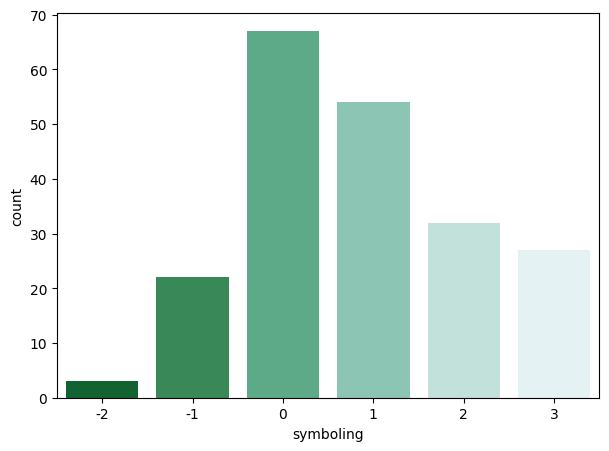

In [8]:
# Membuat plot untuk menghitung dan menampilkan distribusi jumlah mobil berdasarkan nilai 'symboling'.
# figsize=(7,5) menentukan ukuran figur plot.
plt.figure(figsize=(7,5))

# Menggunakan seaborn untuk membuat countplot yang menampilkan distribusi jumlah mobil berdasarkan nilai 'symboling'.
# x='symboling' menunjukkan bahwa sumbu x akan berisi nilai dari kolom 'symboling'.
# data=car_df merupakan DataFrame yang akan digunakan.
# palette="BuGn_r" menentukan skema warna plot.
sn.countplot(x='symboling', data=car_df, palette="BuGn_r")

# Menampilkan plot yang telah dibuat.
plt.show()

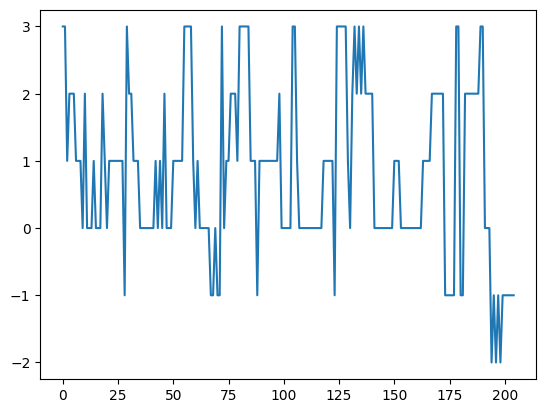

In [9]:
# Membuat plot garis untuk kolom 'symboling' dari DataFrame car_df.
laste = car_df['symboling'].plot()

# Menampilkan plot menggunakan plt.show().
plt.show(laste)

In [11]:
# Membuat array NumPy 'X' yang berisi fitur-fitur yang akan digunakan untuk memprediksi 'symboling'.
X = np.asarray(car_df[['wheelbase', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
                       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']])
# Membuat array NumPy 'y' yang berisi target 'symboling'.
y = np.asarray(car_df['symboling'])

# Melakukan standardisasi fitur-fitur dalam 'X' menggunakan StandardScaler dari scikit-learn.
X = preprocessing.StandardScaler().fit(X).transform(X)

# Memisahkan data menjadi set pelatihan (train) dan set pengujian (test).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=4
)

# Menampilkan ukuran dari set pelatihan dan set pengujian.
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


Train set: (143, 10) (143,)
Test set: (62, 10) (62,)


In [12]:
# Mengimpor kelas LogisticRegression dari scikit-learn untuk membangun model regresi logistik.
from sklearn.linear_model import LogisticRegression

# Membuat objek regresi logistik.
logreg = LogisticRegression()

# Melatih model regresi logistik menggunakan data pelatihan.
logreg.fit(X_train, y_train)

# Memprediksi target 'symboling' pada set pengujian.
y_pred = logreg.predict(X_test)

## Evaluation and accuracy

# Mengimpor fungsi jaccard_score dari scikit-learn untuk mengukur kesamaan Jaccard.
from sklearn.metrics import jaccard_score

# Menghitung kesamaan Jaccard antara nilai sebenarnya (y_test) dan prediksi (y_pred).
jaccard_similarity_score = jaccard_score(y_test, y_pred, average=None)

# Menampilkan akurasi model dalam kesamaan Jaccard.
print('Accuracy of the model in jaccard similarity score is = ', jaccard_similarity_score)


Accuracy of the model in jaccard similarity score is =  [0.         0.         0.32352941 0.57142857 0.11111111 0.625     ]


In [13]:
## This code is contributed by @amartajisce
# Mengimpor kelas RandomForestClassifier dari scikit-learn untuk membangun model klasifikasi Random Forest.
from sklearn.ensemble import RandomForestClassifier

# Membuat objek RandomForestClassifier.
rf = RandomForestClassifier()

# Melatih model Random Forest menggunakan data pelatihan.
rf.fit(X_train, y_train)

# Mengukur akurasi model pada set pengujian dan mengalikan skor dengan 100 untuk mendapatkan persentase.
score = rf.score(X_test, y_test) * 100

# Menampilkan akurasi model.
print('Accuracy of the model is = ', score)


Accuracy of the model is =  67.74193548387096


In [14]:
# Mengimpor fungsi-fungsi yang diperlukan dari sklearn.metrics
from sklearn.metrics import confusion_matrix, classification_report

# Menghitung matriks kebingungan (confusion matrix) berdasarkan nilai sebenarnya (y_test) dan nilai prediksi (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Mencetak nilai-nilai unik dalam y_test
print(np.unique(y_test))

# Mencetak nilai-nilai unik dalam y_pred
print(np.unique(y_pred))


[-2 -1  0  1  2  3]
[-1  0  1  2  3]


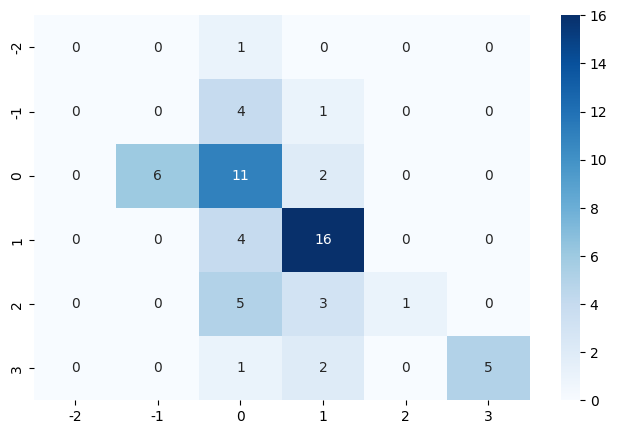

The details for confusion matrix is = 
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         1
          -1       0.00      0.00      0.00         5
           0       0.42      0.58      0.49        19
           1       0.67      0.80      0.73        20
           2       1.00      0.11      0.20         9
           3       1.00      0.62      0.77         8

    accuracy                           0.53        62
   macro avg       0.51      0.35      0.36        62
weighted avg       0.62      0.53      0.51        62



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Mendapatkan nilai unik dari kelas pada y_test dan y_pred
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# Membuat DataFrame dari matriks kebingungan untuk tampilan yang lebih mudah dibaca
conf_matrix = pd.DataFrame(data=cm, columns=unique_labels, index=unique_labels)

# Mengatur ukuran gambar plot heatmap
plt.figure(figsize=(8, 5))

# Menggambar heatmap matriks kebingungan dengan notasi dan warna yang sesuai
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")

# Menampilkan gambar heatmap
plt.show()

# Menampilkan rincian dari matriks kebingungan menggunakan fungsi classification_report
print('The details for confusion matrix is = ')
print(classification_report(y_test, y_pred))
